In [40]:
import django, sys, os
sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()
from scoping.models import *
from tmv_app.models import *

import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt

In [88]:
run_id = 1275
stat = RunStats.objects.get(pk=run_id)

dts = DocDynamicTopic.objects.filter(
    run_id=run_id, doc__PY__in=list(range(2010,2011))
).values('doc__id','doc__title','doc__ipccref__wg__wg','topic__title','score')
data = pd.DataFrame.from_dict(list(dts)).fillna(0)

data = data.pivot_table(
    index=["doc__id","doc__title",'doc__ipccref__wg__wg'],columns="topic__title", values="score"
).rename_axis(None,axis=1).reset_index().set_index(['doc__id','doc__title'])
print(data.shape)
data.head()

(20686, 100)


,,doc__ipccref__wg__wg,"{adaptation, local, mitigation}","{adsorption, membrane, capacity}","{arctic, permafrost, thaw}","{area, region, study}","{biomass, stand, estimate}","{building, construction, design}","{carbon, low, sink}","{ch4, methane, oxidation}","{change, response, shift}",...,"{uncertainty, estimate, projection}","{urban, urbanization, rural}","{vegetation, ndvi, index}","{vehicle, road, car}","{vulnerability, index, resilience}","{water, deep, vapor}","{wetland, marsh, peat}","{wind, speed, wave}","{winter, season, summer}","{year, period, annual}"
doc__id,doc__title,,,,,,,,,,,,,,,,,,,,,
28,Spatiotemporal change in China's climatic growing season: 1955-2000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014096,NaN
75,Requirements and Functional Analysis of a Multi-Hazard Disaster-Risk Analysis System,0.0,0.011298,NaN,NaN,NaN,NaN,0.012782,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Net Energy and Greenhouse Gas Emission Evaluation of Biodiesel Derived from Microalgae,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.015669,NaN,NaN,NaN,NaN,NaN,NaN
272,Surge modelling in the eastern Irish Sea: present and future storm impact,1.0,0.010282,NaN,NaN,0.021364,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060642,NaN,NaN
300,Estimating economic value of agricultural water under changing conditions and the effects of spatial aggregation,0.0,NaN,NaN,NaN,0.010672,NaN,NaN,NaN,NaN,0.012882,...,NaN,NaN,NaN,NaN,NaN,0.045752,NaN,NaN,NaN,NaN


['doc__ipccref__wg__wg', '{coral, reef, bleaching}', '{vulnerability, index, resilience}', '{network, design, propose}', '{urban, urbanization, rural}', '{policy, government, national}', '{fuel, engine, combustion}', '{cost, benefit, economic}', '{material, waste, concrete}', '{city, plan, smart}', '{coal, combustion, gasification}', '{vehicle, road, car}', '{technology, cc, development}', '{building, construction, design}']


/home/galm/software/django/tmv/venv/lib/python3.6/site-packages/pandas/plotting/_misc.py:242: RuntimeWarning: invalid value encountered in true_divide
  y = (s * row_).sum(axis=0) / row.sum()


(-1.10125, 1.12625, -1.1194797615078593, 1.1194797615078593)

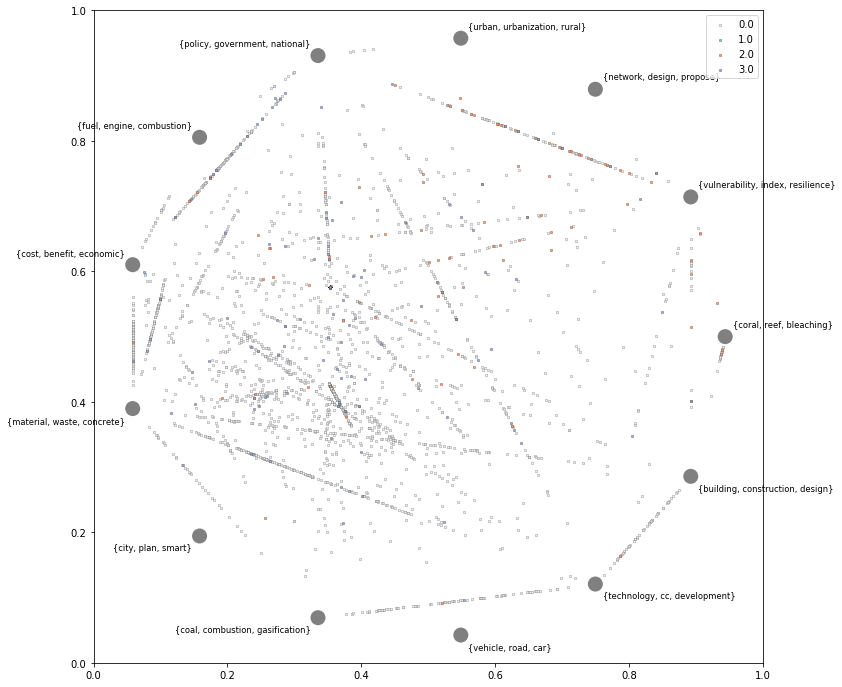

In [90]:
fig, ax = plt.subplots(figsize=(12,12))

cols = ["doc__ipccref__wg__wg"]

topics = DynamicTopic.objects.filter(id__in=[
    12156,
    #12179,
    12160, # waste
    12167,
    12187,
    12152,
    12195,
    12150,
    12200,
    12186,
    12157,
    12172,
    12178,
    #12221,
    12202,
    12218    
])

cols += [x.title for x in topics.order_by('primary_wg') if x.title in data.columns]

print(cols)

from matplotlib.colors import ListedColormap

colors = ["#f0f0f0", "#66c2a5","#fc8d62","#8da0cb"]

radviz(
    data[cols].fillna(0),
    "doc__ipccref__wg__wg", 
    color=colors, 
    edgecolors="black",
    linewidths=0.2,
    s=8,
    alpha=0.8
)

plt.axis('off')